<a href="https://colab.research.google.com/github/DikshantBadawadagi/Tata_Group_Data_Visualization/blob/main/TATA_Group_Data_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

file_path = "/content/Online Retail.xlsx"
data = pd.read_excel(file_path, engine='openpyxl')

print("Dataset Info:")
print(data.info())

print("\nFirst 5 rows:")
print(data.head())

print("\nMissing Values:")
print(data.isnull().sum())

sample_data = data.sample(10000, random_state=42)

print("\nSample Data Info:")
print(sample_data.info())

print("\nSample Data Preview:")
print(sample_data.head())

print("\nAll the columns")
print(data.columns)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB
None

First 5 rows:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER

In [3]:
file_path = "/content/Online Retail.xlsx"
df = pd.read_excel(file_path, engine='openpyxl')

Description
DOTCOM POSTAGE                        206245.48
REGENCY CAKESTAND 3 TIER              164762.19
WHITE HANGING HEART T-LIGHT HOLDER     99668.47
PARTY BUNTING                          98302.98
JUMBO BAG RED RETROSPOT                92356.03
RABBIT NIGHT LIGHT                     66756.59
POSTAGE                                66230.64
PAPER CHAIN KIT 50'S CHRISTMAS         63791.94
ASSORTED COLOUR BIRD ORNAMENT          58959.73
CHILLI LIGHTS                          53768.06
Name: Revenue, dtype: float64


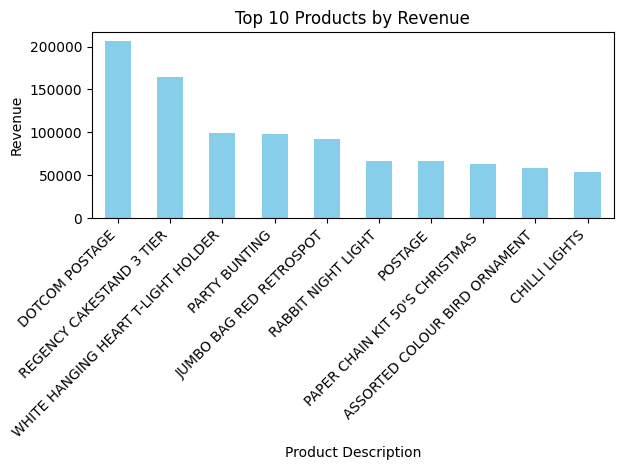

In [4]:
df['Revenue'] = df['Quantity'] * df['UnitPrice']

top_products = df.groupby('Description')['Revenue'].sum().sort_values(ascending=False).head(10)
print(top_products)

import matplotlib.pyplot as plt
top_products.plot(kind='bar', color='skyblue')
plt.title('Top 10 Products by Revenue')
plt.xlabel('Product Description')
plt.ylabel('Revenue')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


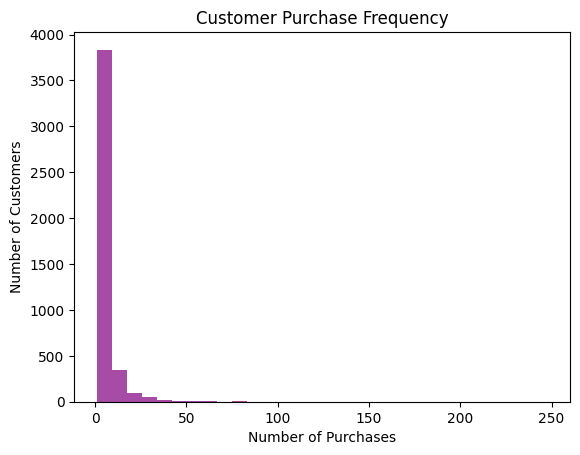

In [5]:
customer_purchases = df.groupby('CustomerID')['InvoiceNo'].nunique()

plt.hist(customer_purchases, bins=30, color='purple', alpha=0.7)
plt.title('Customer Purchase Frequency')
plt.xlabel('Number of Purchases')
plt.ylabel('Number of Customers')
plt.show()


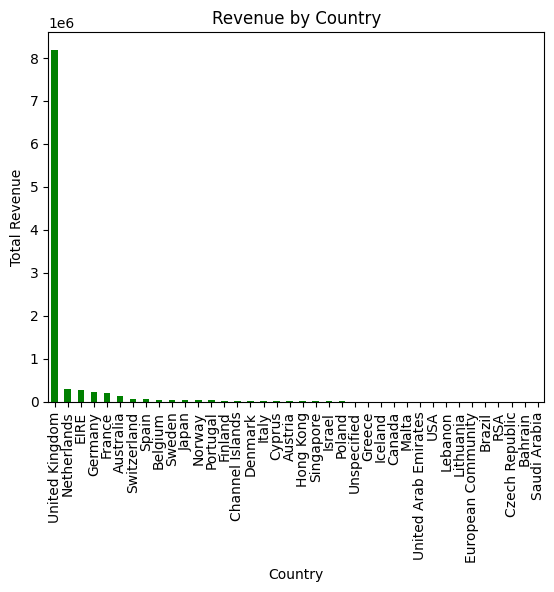

In [6]:
country_revenue = df.groupby('Country')['Revenue'].sum().sort_values(ascending=False)

country_revenue.plot(kind='bar', color='green')
plt.title('Revenue by Country')
plt.xlabel('Country')
plt.ylabel('Total Revenue')
plt.show()


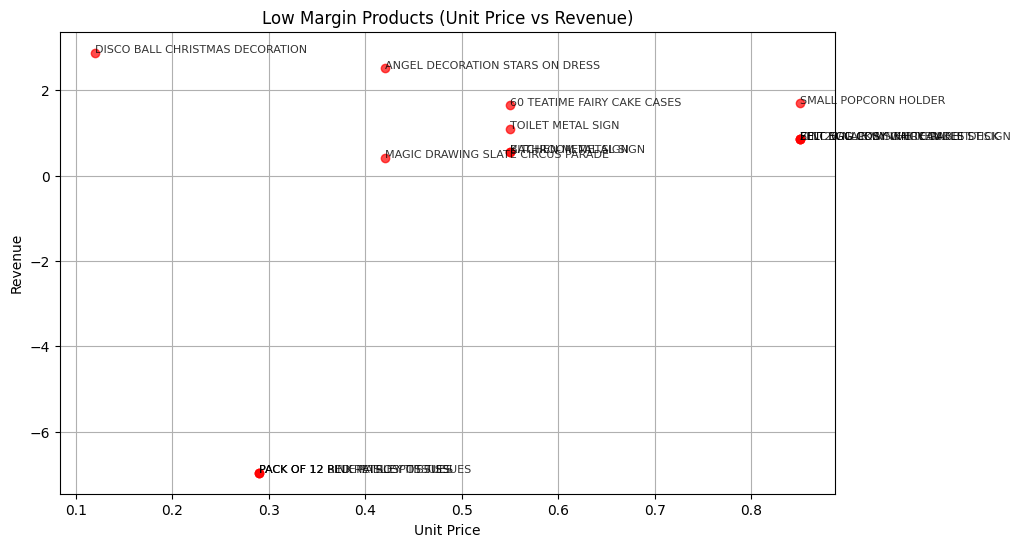

In [12]:
import matplotlib.pyplot as plt

low_margin_products = df[(df['UnitPrice'] < df['UnitPrice'].quantile(0.25)) &
                         (df['Revenue'] < df['Revenue'].quantile(0.25))]

top_low_margin_products = low_margin_products[['Description', 'Revenue', 'UnitPrice']].head(15)

plt.figure(figsize=(10, 6))
plt.scatter(top_low_margin_products['UnitPrice'], top_low_margin_products['Revenue'], color='red', alpha=0.7)

for i, row in top_low_margin_products.iterrows():
    plt.annotate(row['Description'], (row['UnitPrice'], row['Revenue']), fontsize=8, alpha=0.8)

plt.title('Low Margin Products (Unit Price vs Revenue)')
plt.xlabel('Unit Price')
plt.ylabel('Revenue')
plt.grid(True)
plt.show()


In [7]:
low_margin_products = df[(df['UnitPrice'] < df['UnitPrice'].quantile(0.25)) & (df['Revenue'] < df['Revenue'].quantile(0.25))]
print(low_margin_products[['Description', 'Revenue', 'UnitPrice']].head(10))


                            Description  Revenue  UnitPrice
114               FELT EGG COSY CHICKEN     0.85       0.85
127         FELT EGG COSY WHITE RABBIT      0.85       0.85
128    ZINC WILLIE WINKIE  CANDLE STICK     0.85       0.85
236    PACK OF 12 PINK PAISLEY TISSUES     -6.96       0.29
237    PACK OF 12 BLUE PAISLEY TISSUES     -6.96       0.29
238   PACK OF 12 RED RETROSPOT TISSUES     -6.96       0.29
341                 BATHROOM METAL SIGN     0.55       0.55
342                  KITCHEN METAL SIGN     0.55       0.55
343                   TOILET METAL SIGN     1.10       0.55
348  SET 20 NAPKINS FAIRY CAKES DESIGN      0.85       0.85


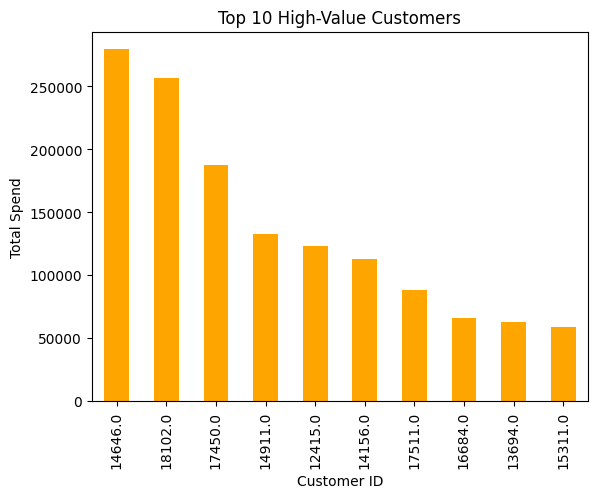

In [8]:
customer_spend = df.groupby('CustomerID')['Revenue'].sum().sort_values(ascending=False).head(10)

customer_spend.plot(kind='bar', color='orange')
plt.title('Top 10 High-Value Customers')
plt.xlabel('Customer ID')
plt.ylabel('Total Spend')
plt.show()


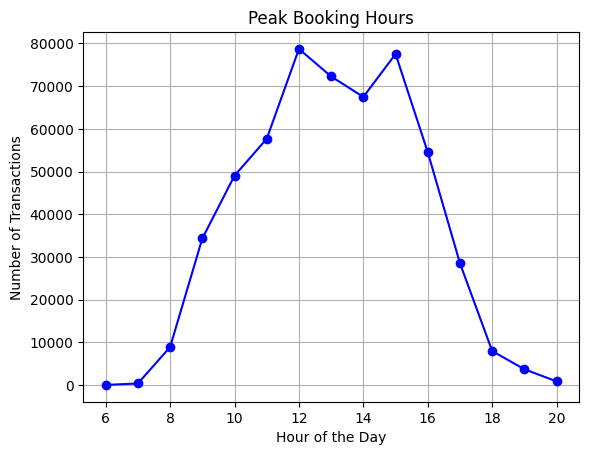

In [9]:
df['Hour'] = df['InvoiceDate'].dt.hour

hourly_sales = df.groupby('Hour')['InvoiceNo'].count()


hourly_sales.plot(kind='line', marker='o', color='blue')
plt.title('Peak Booking Hours')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Transactions')
plt.grid(True)
plt.show()


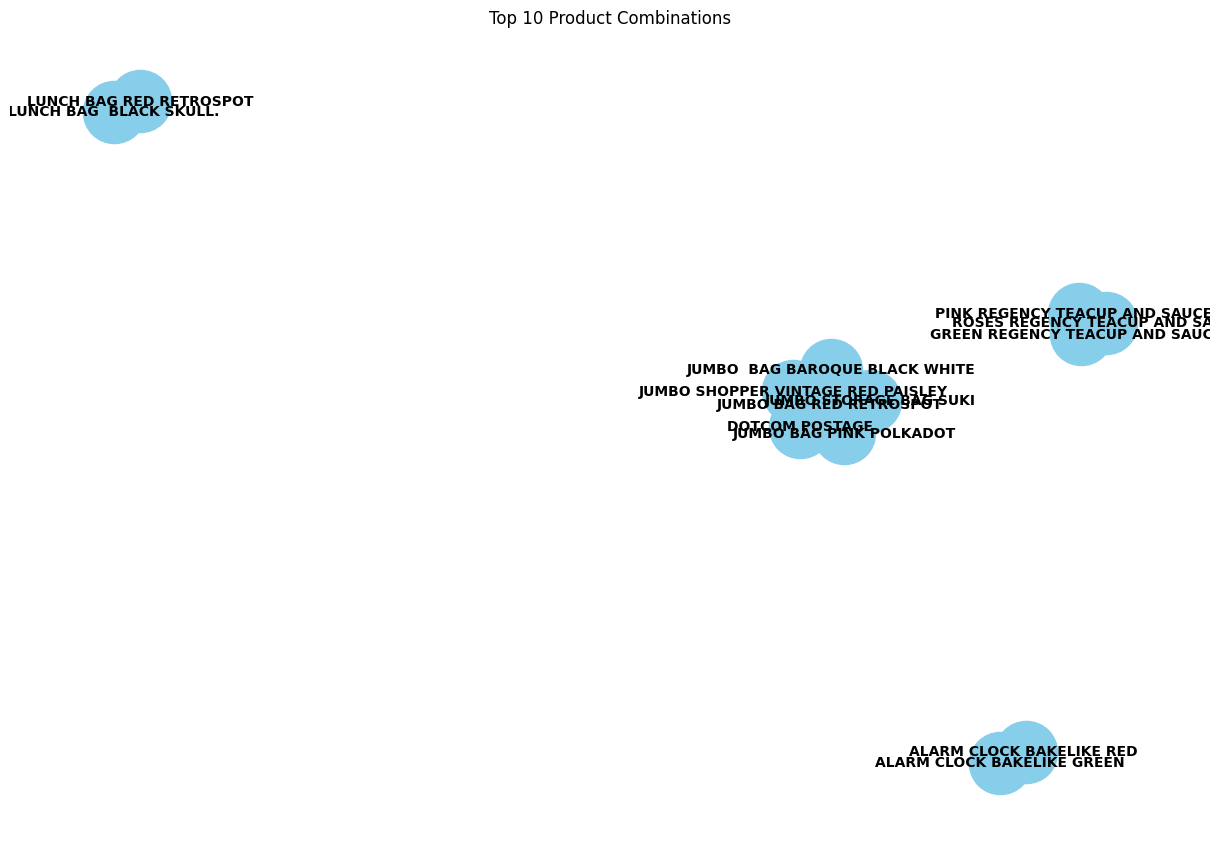

In [13]:
import networkx as nx
import matplotlib.pyplot as plt

top_combos = dict(combos.most_common(10))

G = nx.Graph()

for pair, count in top_combos.items():
    G.add_edge(pair[0], pair[1], weight=count)

plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=0.5)
nx.draw(G, pos, with_labels=True, node_size=2000, node_color='skyblue', font_size=10, font_weight='bold')
edge_labels = {(pair[0], pair[1]): count for pair, count in top_combos.items()}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')

plt.title('Top 10 Product Combinations')
plt.show()


In [10]:
from itertools import combinations
from collections import Counter

basket = df.groupby('InvoiceNo')['Description'].apply(list)

combos = Counter()
for items in basket:
    combos.update(combinations(items, 2))

print(combos.most_common(10))


[(('GREEN REGENCY TEACUP AND SAUCER', 'PINK REGENCY TEACUP AND SAUCER'), 618), (('JUMBO BAG PINK POLKADOT', 'JUMBO BAG RED RETROSPOT'), 544), (('GREEN REGENCY TEACUP AND SAUCER', 'ROSES REGENCY TEACUP AND SAUCER '), 534), (('JUMBO SHOPPER VINTAGE RED PAISLEY', 'JUMBO BAG RED RETROSPOT'), 467), (('JUMBO BAG RED RETROSPOT', 'DOTCOM POSTAGE'), 461), (('JUMBO STORAGE BAG SUKI', 'JUMBO BAG RED RETROSPOT'), 458), (('LUNCH BAG RED RETROSPOT', 'LUNCH BAG  BLACK SKULL.'), 443), (('PINK REGENCY TEACUP AND SAUCER', 'ROSES REGENCY TEACUP AND SAUCER '), 419), (('ALARM CLOCK BAKELIKE GREEN', 'ALARM CLOCK BAKELIKE RED '), 396), (('JUMBO BAG RED RETROSPOT', 'JUMBO  BAG BAROQUE BLACK WHITE'), 396)]


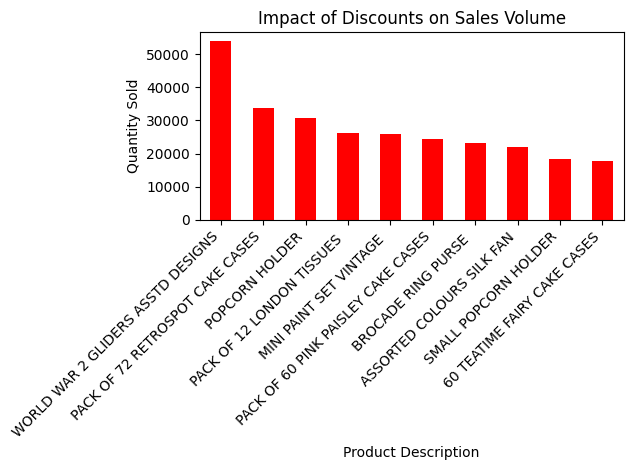

In [11]:
discounted_sales = df[df['UnitPrice'] < df['UnitPrice'].quantile(0.25)]

discount_impact = discounted_sales.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

discount_impact.plot(kind='bar', color='red')
plt.title('Impact of Discounts on Sales Volume')
plt.xlabel('Product Description')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
